In [1]:
from Wavelet import (
    HaarWaveletTransform,
    HaarWaveletInverseTransform
)
from Wavelet import (
    normalize_image,
    convert_to_gray,
    calculate_psnr
)

In [2]:
from PIL import Image
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
def load_image(filename: str) -> np.array:
    img = Image.open(filename)
    return np.array(img)

In [5]:
image_path = 'Images/lena.png'

In [6]:
input_image = load_image(
    filename=image_path)

In [7]:
haar_transform = HaarWaveletTransform(
    input_image=input_image)

In [8]:
haar_transform(levels=5)

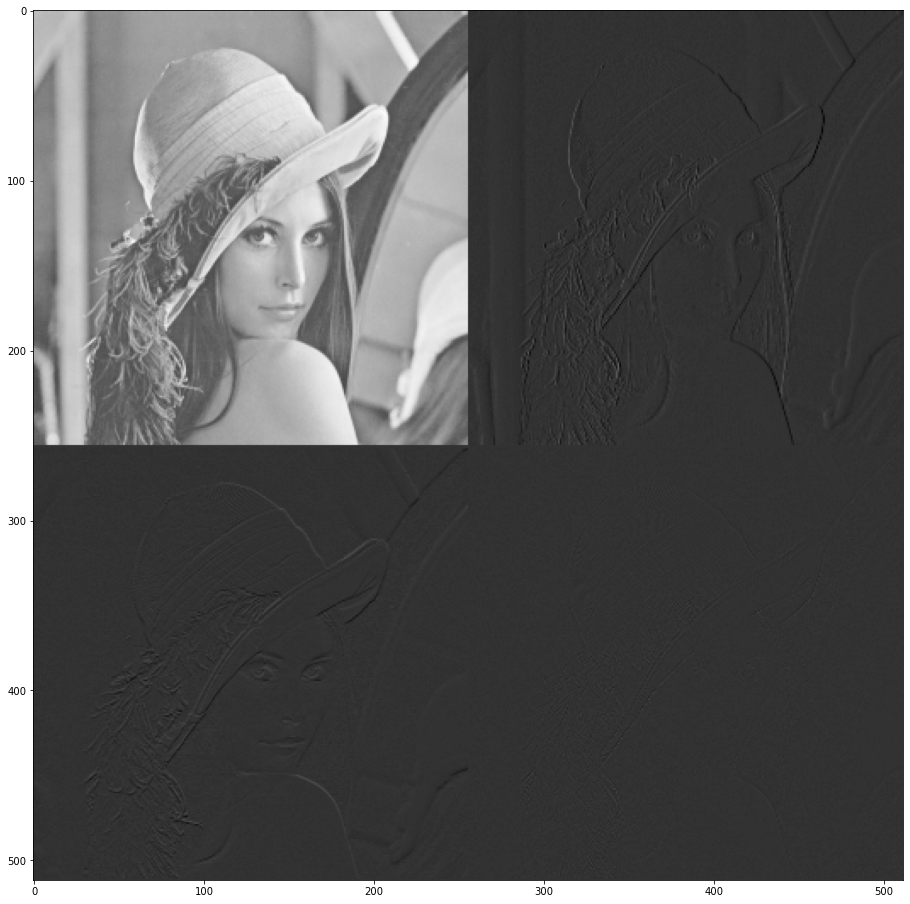

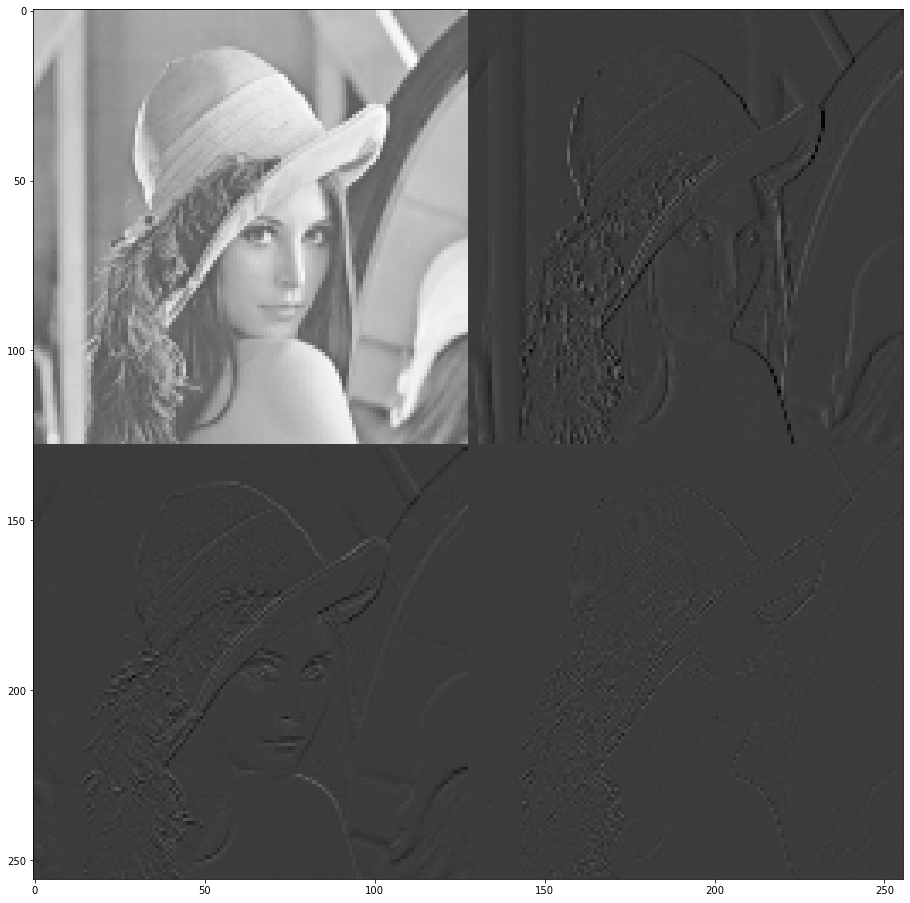

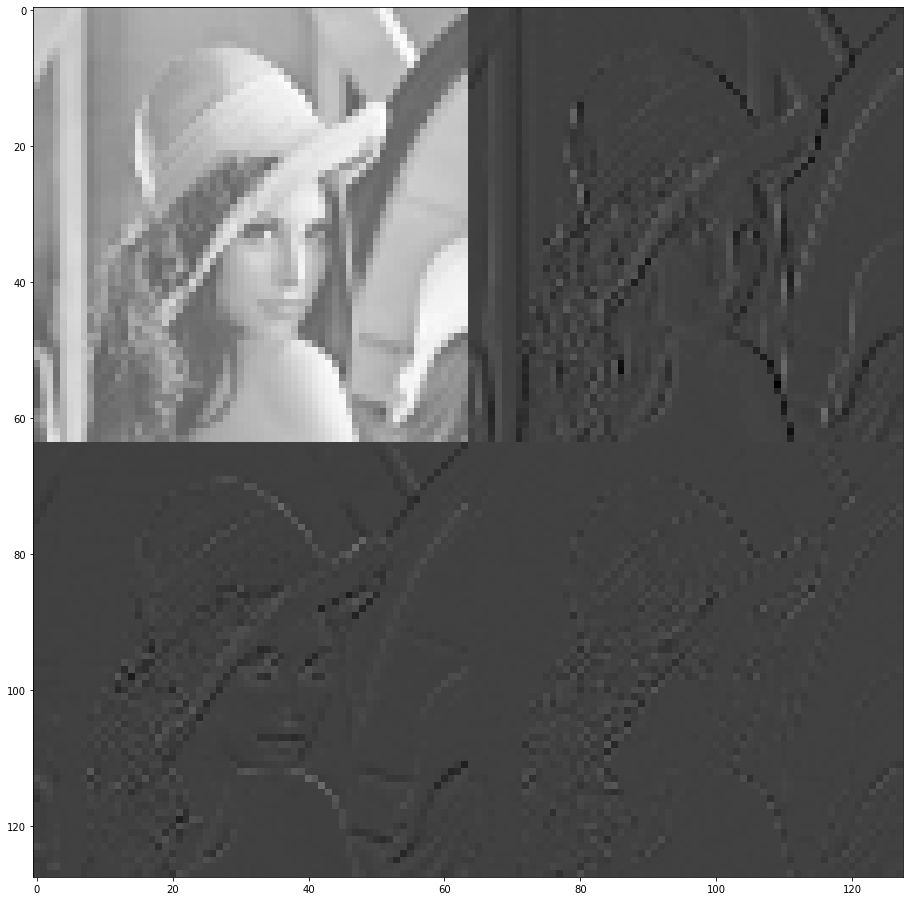

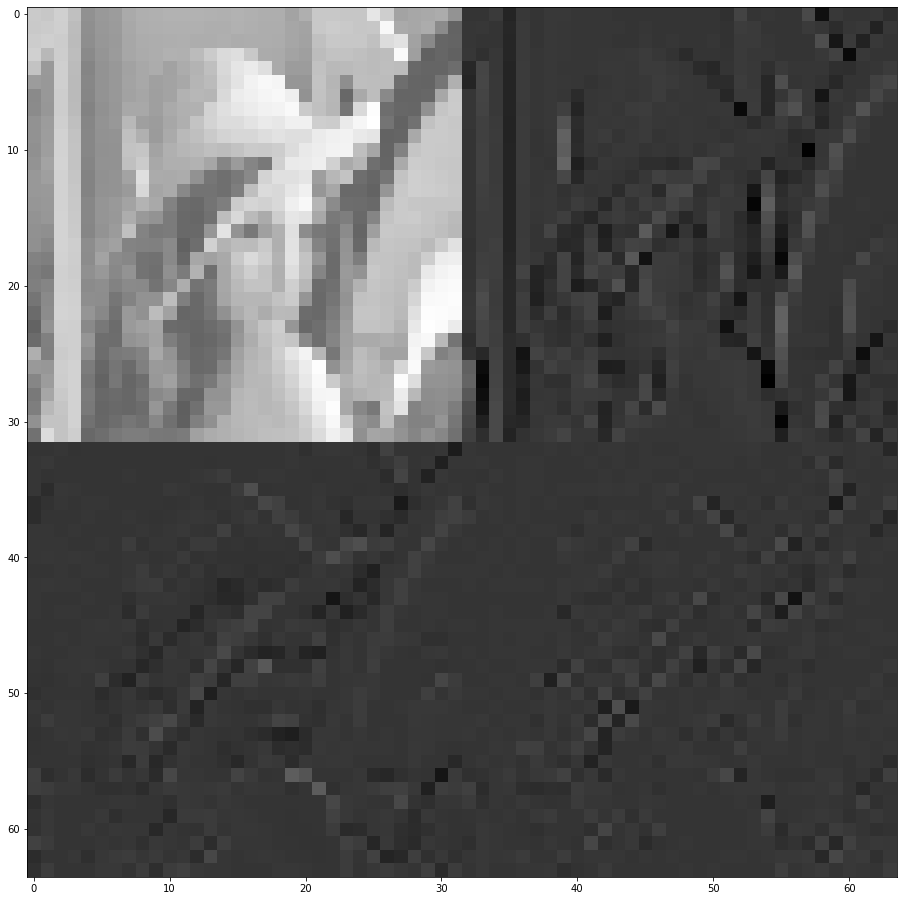

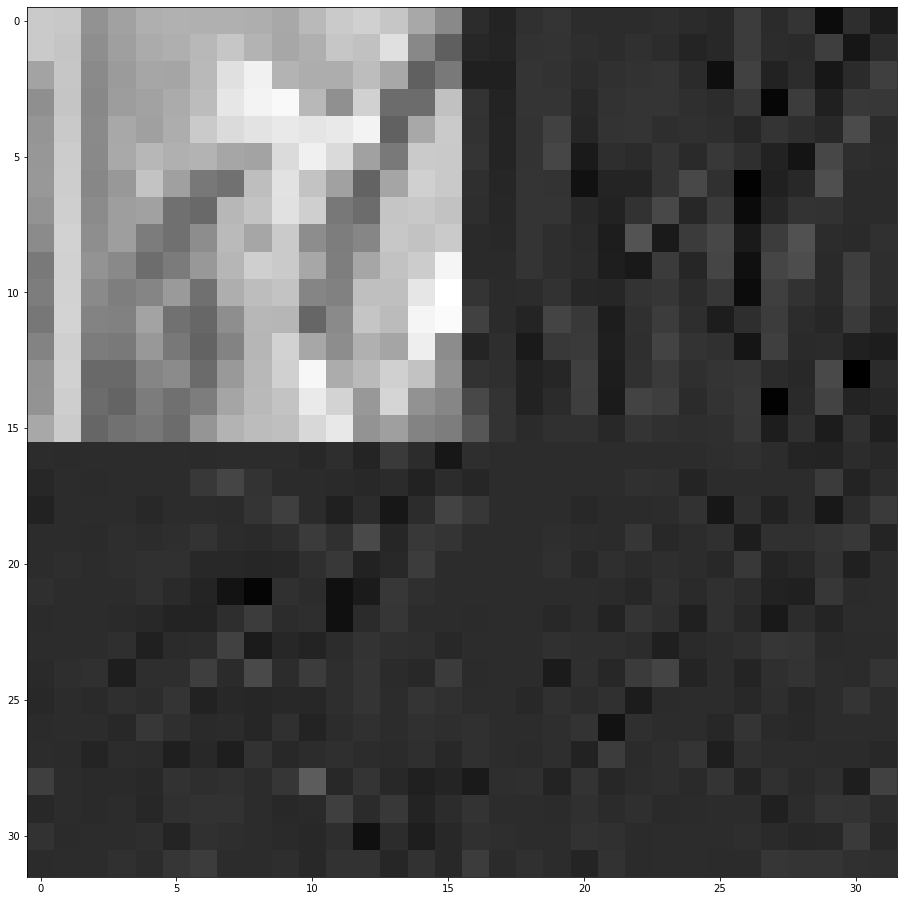

In [9]:
for wavelet in haar_transform:
    result = wavelet.get_normalized()
    plt.figure(figsize=(16,16))
    plt.imshow(result.astype('uint8'), cmap=plt.get_cmap('gray'))
    plt.show()

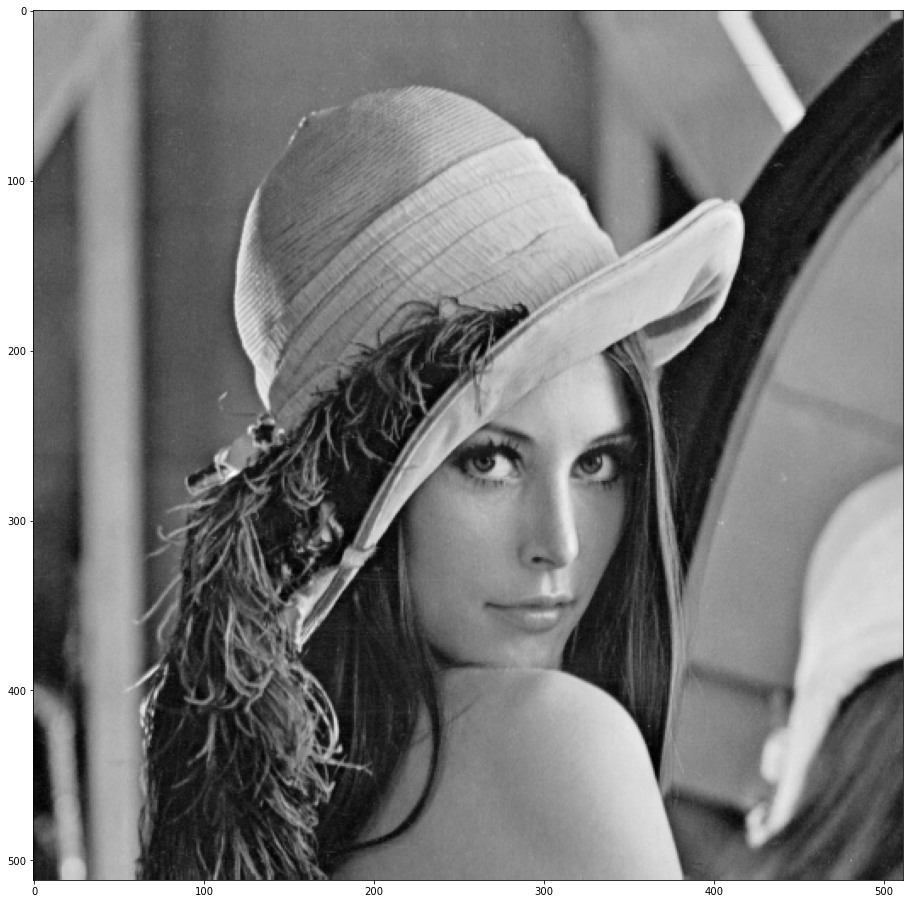

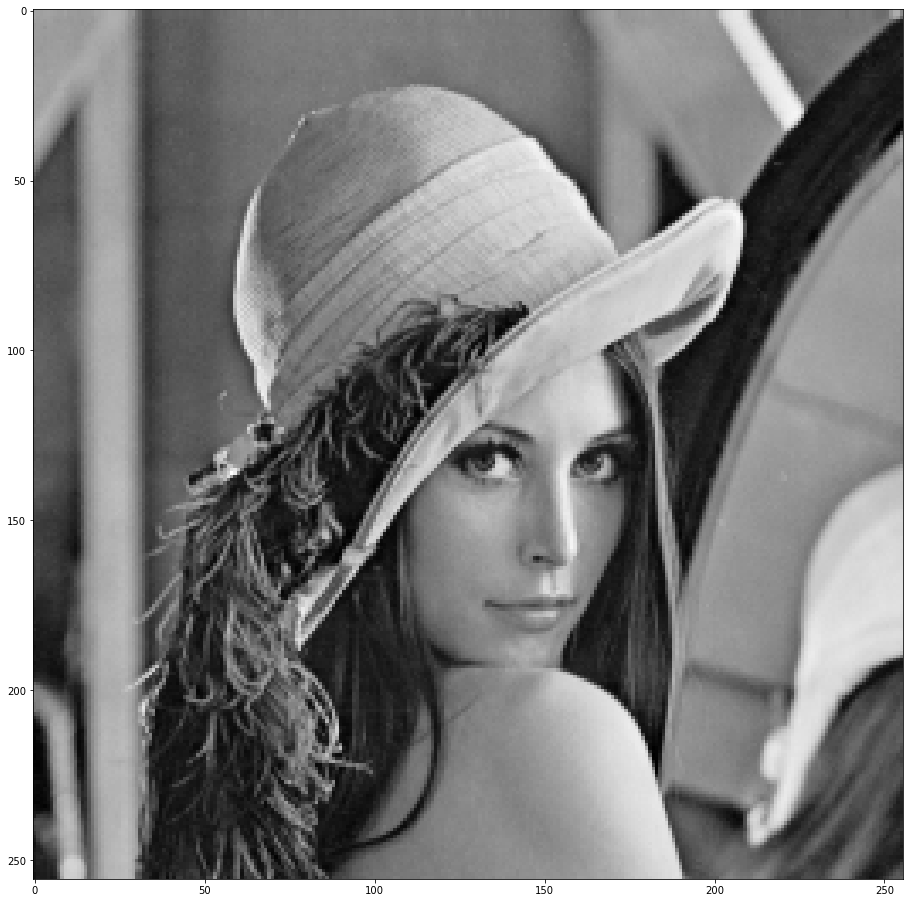

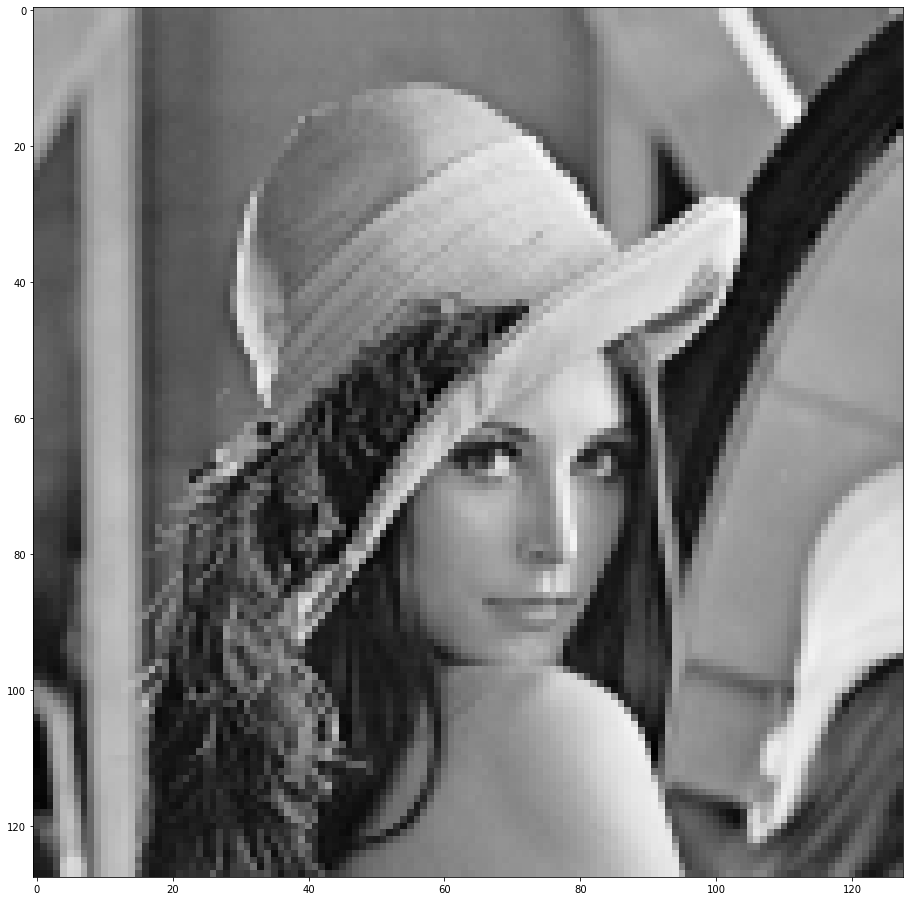

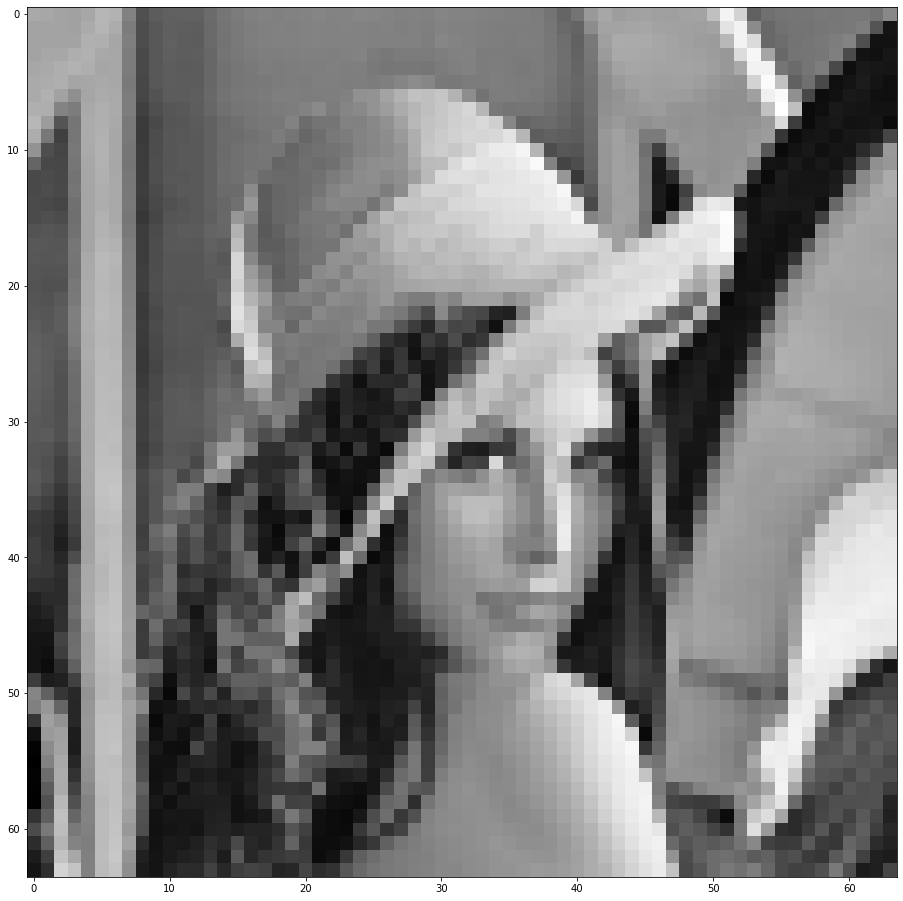

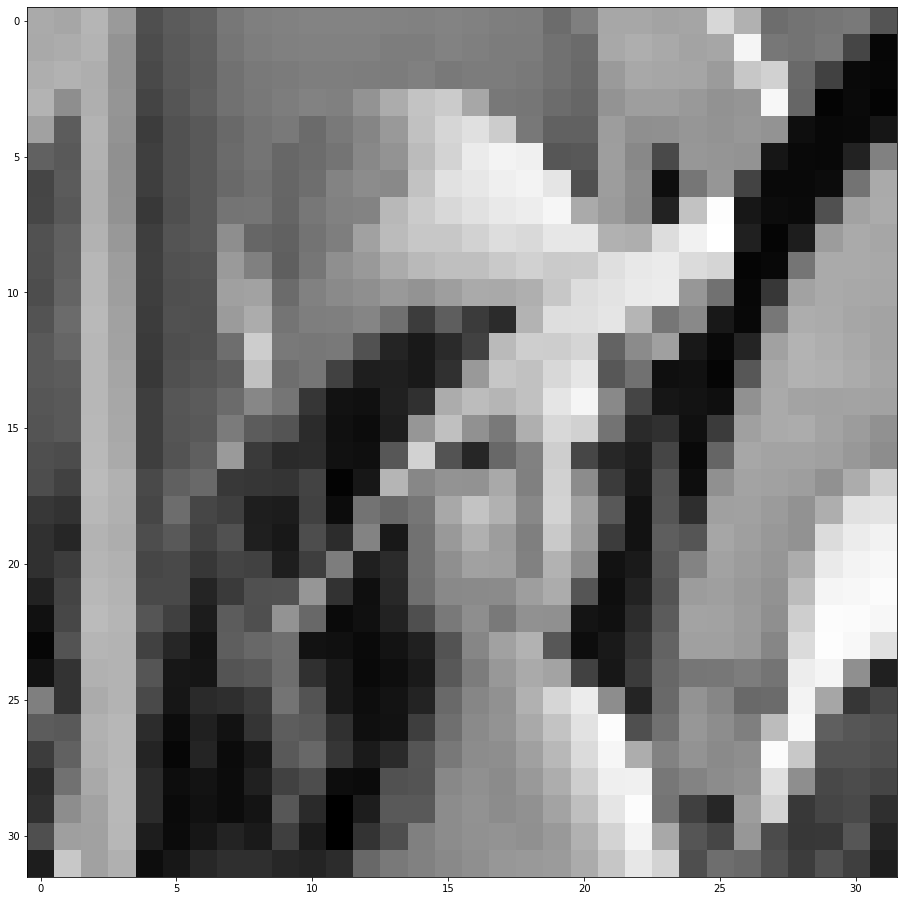

In [10]:
for wavelet in haar_transform:
    haar_inverse_transform = HaarWaveletInverseTransform(wavelet=wavelet)
    result = normalize_image(input_image=haar_inverse_transform())
    plt.figure(figsize=(16,16))
    plt.imshow(result.astype('uint8'), cmap=plt.get_cmap('gray'))
    plt.show()

In [11]:
haar_inverse_transform = HaarWaveletInverseTransform(wavelet=haar_transform[0])
result = normalize_image(haar_inverse_transform())
psnr = calculate_psnr(img1=convert_to_gray(input_image=input_image), img2=result)
psnr

26.613732154495597